<a href="https://colab.research.google.com/github/logicalscorpio/Trying-CNN/blob/main/Mnist10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Lambda, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import to_categorical


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/digit-recognizer/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/digit-recognizer/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/digit-recognizer/sample_submission.csv')

In [ ]:
print(f"Training data size is {train.shape}\nTesting data size is {test.shape}")

Training data size is (42000, 785)
Testing data size is (28000, 784)


In [ ]:
X = train.drop(['label'], axis=1).values
y = train['label'].values

In [ ]:
X = X / 255.0

In [ ]:
X = X.reshape(-1,28,28,1)

In [ ]:
y = to_categorical(y)
y.shape

(42000, 10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

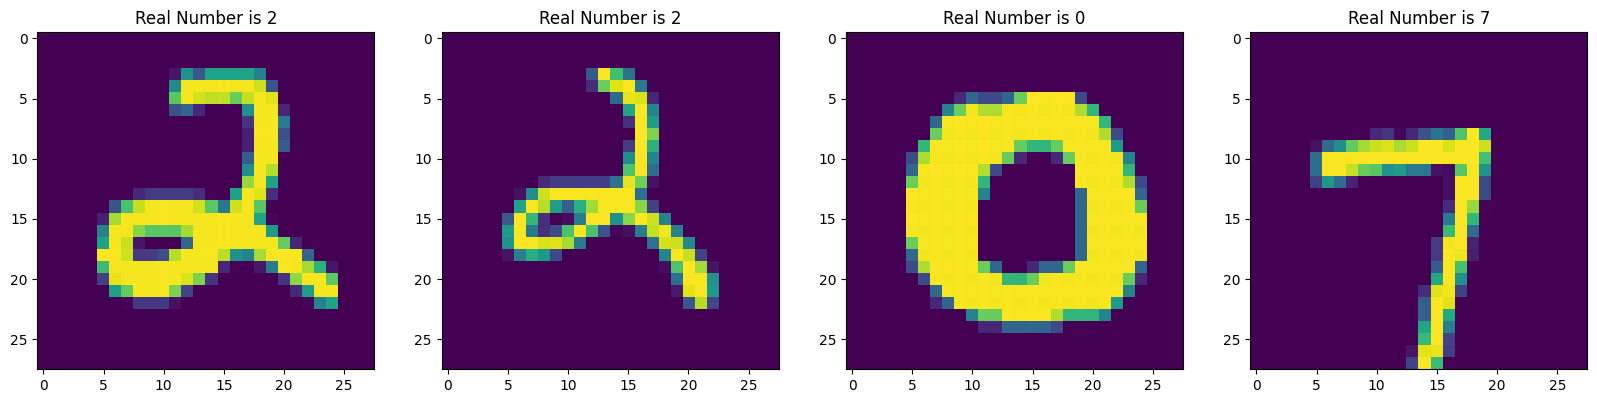

In [ ]:
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)
fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i])
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}")

In [ ]:
mean = np.mean(X_train)
std = np.std(X_train)

def standardize(x):
    return (x-mean)/std

In [ ]:
model=Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512,activation="relu"))

model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 1, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 692,682 (2.64 MB)

 Trainable params: 691,786 (2.64 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_gen = datagen.flow(X_train, y_train, batch_size=128)
test_gen = ImageDataGenerator().flow(X_test, y_test, batch_size=128)

In [ ]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

epochs = 100
batch_size = 128
train_steps = int(np.ceil(X_train.shape[0] / batch_size))
valid_steps = int(np.ceil(X_test.shape[0] / batch_size))

es = keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=10,
        verbose=1,
        mode="max",
        restore_best_weights=True,
     )

rp = keras.callbacks.ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

In [ ]:
history = model.fit(
    train_gen,
    epochs=epochs,
    steps_per_epoch=train_steps,
    validation_data=test_gen,
    validation_steps=valid_steps,
    callbacks=[es, rp],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


296/296 ━━━━━━━━━━━━━━━━━━━━ 26s 64ms/step - accuracy: 0.8925 - loss: 0.3418 - val_accuracy: 0.8124 - val_loss: 0.7847 - learning_rate: 0.0010
Epoch 2/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9779 - loss: 0.0700 - val_accuracy: 0.9779 - val_loss: 0.0743 - learning_rate: 0.0010
Epoch 3/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.9849 - loss: 0.0502 - val_accuracy: 0.9917 - val_loss: 0.0291 - learning_rate: 0.0010
Epoch 4/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9884 - loss: 0.0409 - val_accuracy: 0.9874 - val_loss: 0.0402 - learning_rate: 0.0010
Epoch 5/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9885 - loss: 0.0370 - val_accuracy: 0.9874 - val_loss: 0.0372 - learning_rate: 0.0010
Epoch 6/100
295/296 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9876 - loss: 0.0361
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
296/296 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9876 - loss: 0.

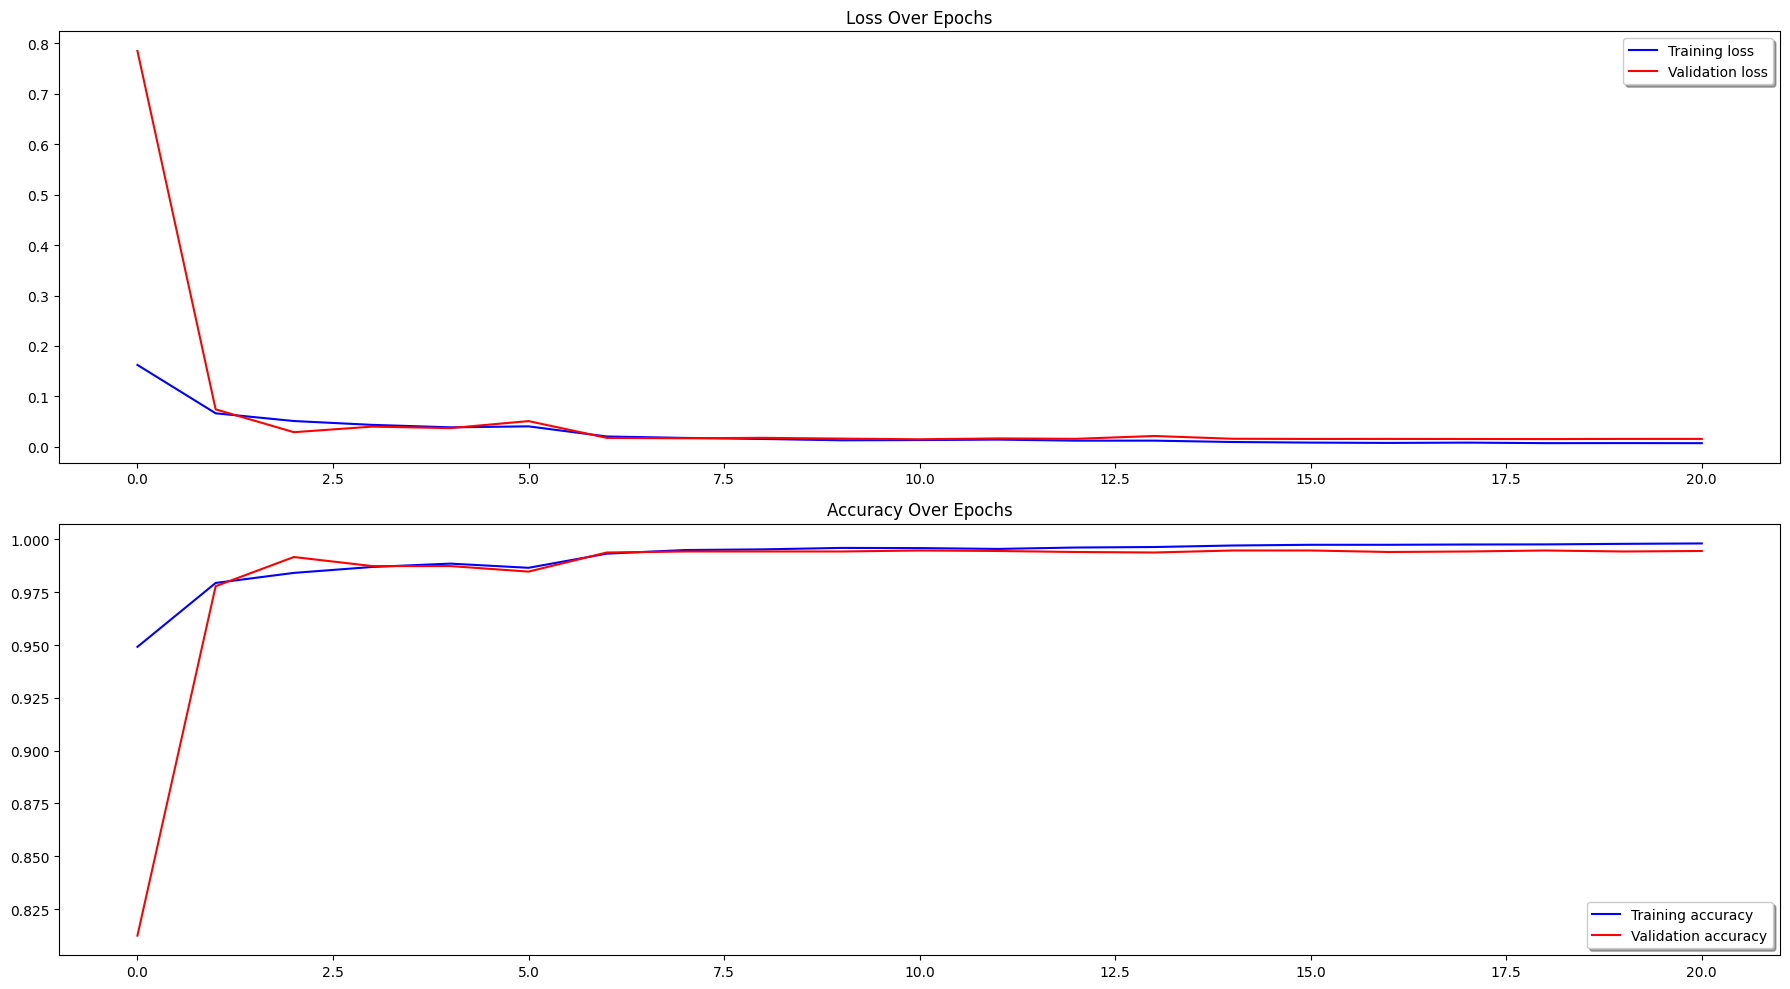

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(18, 10))

ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title("Loss Over Epochs")

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title("Accuracy Over Epochs")

plt.tight_layout()
plt.show()


132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


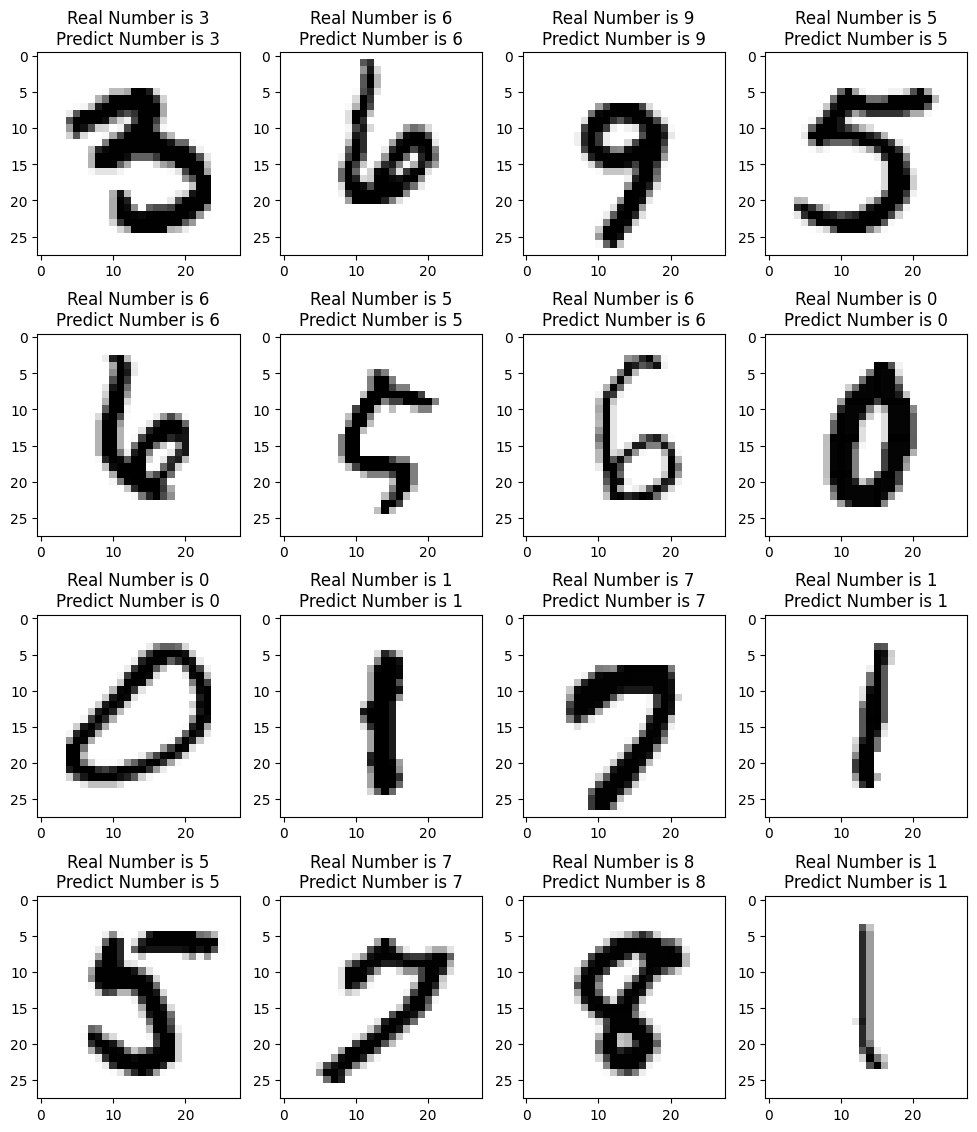

In [ ]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

In [ ]:
test_x = test.values
test_x = test_x / 255.0
test_x = test_x.reshape(-1,28,28,1)

pred_probs = model.predict(test_x, verbose=1)
pred = np.argmax(pred_probs, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [ ]:
sub['Label'] = pred
sub.to_csv("CNN_keras_sub.csv", index=False)
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
